In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
# Setup
sns.set(
    style="ticks",
    context="notebook",
    palette="colorblind"
)
%matplotlib inline

# **Desafio: Construindo um modelo de Regressão para marketing**

## **Contexto - Introdução**

Uma empresa está investindo mensalmente em plataformas de publicidade online,
como Youtube, Facebook e newspaper, para a prospecção de leads (pessoas
interessadas em seus produtos). A fim de acompanhar o desempenho desses
investimentos, a empresa registra todos os gastos com publicidade e todos os retornos
de vendas gerados a partir desses investimentos. <br><br>
Para **entender** melhor a **relação entre as variáveis** presentes nesses registros e
**identificar os fatores que mais impactam** na geração de leads, a empresa solicitou a
análise de um especialista em dados. Além disso, a empresa busca criar um
**modelo de predição** de valores para estimar o retorno de vendas que pode ser gerado
a partir de um determinado investimento em publicidade.

### **Sobre os dados**

A tabela contém informações dos investimentos feitos pelo youtube, facebook,
newspaper e também a quantidade de cada.


|Coluna   |Descrição             |
|:--------|:---------------------|
|youtube  |Investimento youtube  |
|facebook |Investimento facebook |
|newspaper|Investimento newspaper|
|sales    |Valor das vendas      |


### 1. Importação do dataset

In [3]:
# Carregando o dataset
df = pd.read_csv("MKT.csv")

# Visualizando as primeiras linhas
df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [4]:
# Verificando informações das variáveis
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [5]:
# Verificando algumas estatísticas
df.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


### 2. Análise Exploratória

Análise gráfica da distribuição das variáveis

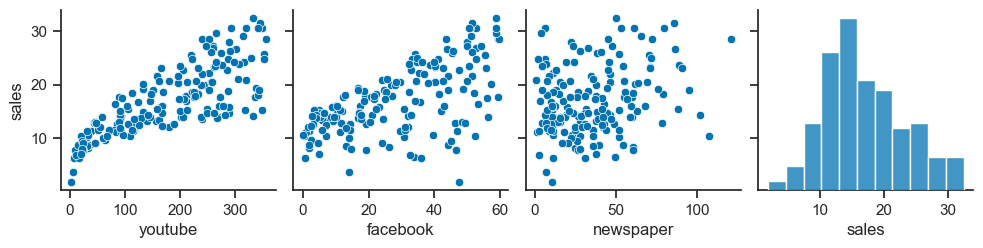

In [6]:
# Pairplot para análise da relação das variáveis
sns.pairplot(df, y_vars="sales");

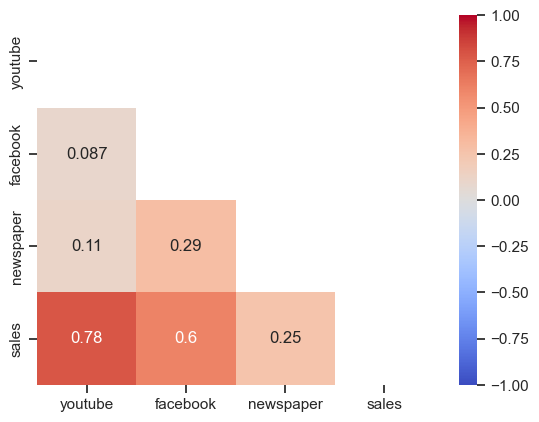

In [7]:
# Analise de correlação entre variáveis, correlação de pearson
pearsonr = df.corr()
mask = np.triu(np.ones_like(pearsonr, dtype="bool"))
sns.heatmap(pearsonr, mask=mask, cmap="coolwarm", annot=True,
            vmin=-1, vmax=1);

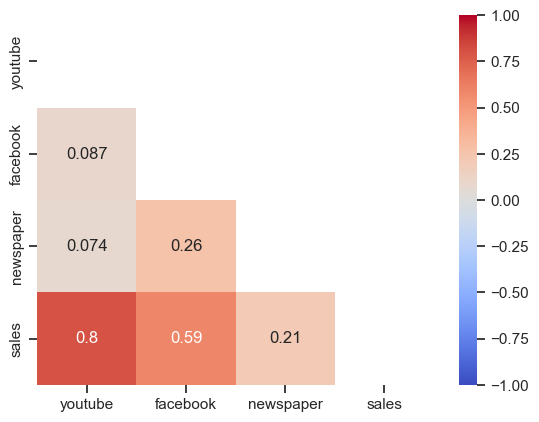

In [8]:
# Analise de correlação entre variáveis, correlação de spearman
spearmanr = df.corr(method='spearman')
sns.heatmap(spearmanr, mask=mask, cmap="coolwarm", annot=True,
            vmin=-1, vmax=1);

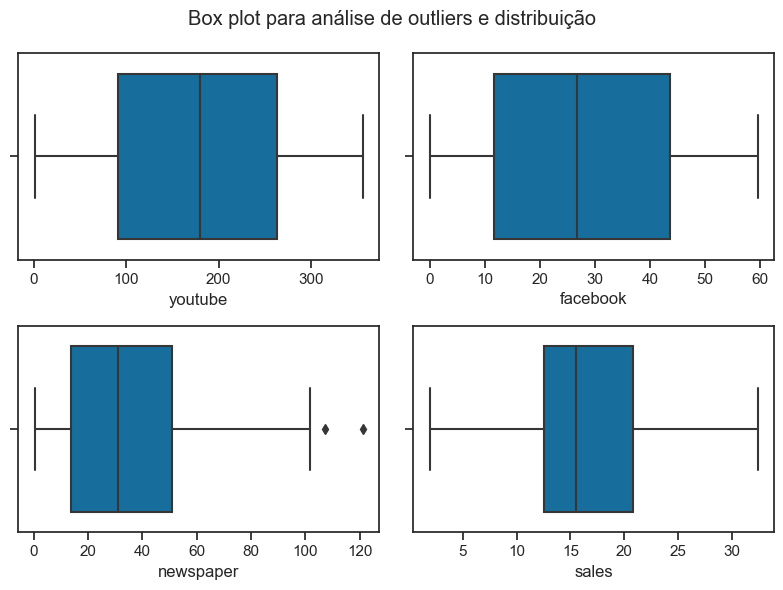

In [9]:
# Análise de outliers por box plot
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))
ax = ax.flatten()
cols = df.columns
for i, col in enumerate(cols):
    sns.boxplot(data=df, x=col, ax=ax[i])
fig.suptitle("Box plot para análise de outliers e distribuição", ha="center")
fig.tight_layout();

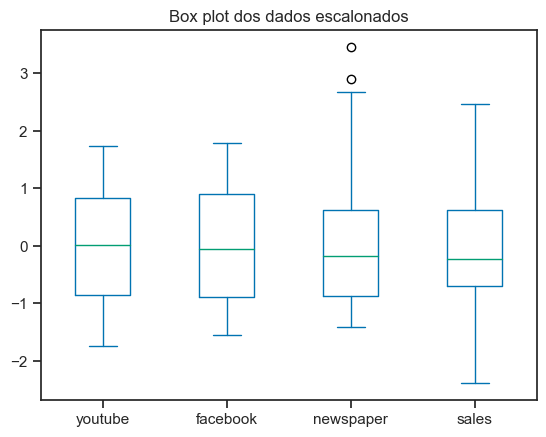

In [10]:
# Analisando box plot dos dados escalonados
df.apply(scale).plot.box()
plt.title("Box plot dos dados escalonados");

### 3. Modelagem

In [11]:
# Separando o dataset em X (variáveis regressoras) e y (variável resposta)
X = df.copy().iloc[:, :-1]
y = df.copy()["sales"]

# Separando a base em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=20)

# Treinando o modelo
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Testando o modelo
y_pred = lin_reg.predict(X_test)

### 4. Predição

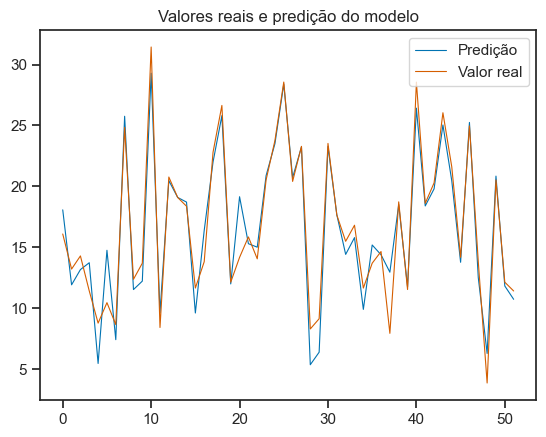

In [12]:
# Avaliando o modelo comparando o valor predito com os valores de teste
plt.plot(y_pred, lw=.8, c="b", label="Predição")
plt.plot(y_test.values, lw=.8, c="r", label="Valor real")
plt.title("Valores reais e predição do modelo")
plt.legend();

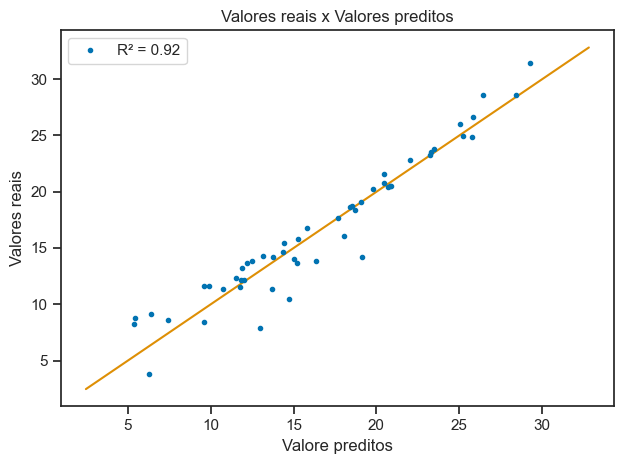

In [13]:
# Avaliando o mdelo pelo R² de Pearson
r2 = r2_score(y_pred, y_test)
plt.plot(y_pred, y_test, ".",  label=f"R² = {r2:.2f}")
plt.plot(plt.gca().get_ylim(), plt.gca().get_ylim(), zorder=0)
plt.xlabel("Valore preditos")
plt.ylabel("Valores reais")
plt.legend()
plt.title("Valores reais x Valores preditos")
plt.tight_layout();

### 5. Conclusão

A variável resposta sales tem forte correlação com os investimentos no youtube, moderada com os investimentos no facebook e baixa com os investimentos em newspaper, o que se reflete nos coeficientes do modelo de regressão, que são mostrados na célula a seguir.

In [14]:
# Coeficientes do modelo de regressão linear
lin_reg.coef_

array([0.04556017, 0.19033898, 0.00441111])

Pela baixa correlação com a variável resposta e pequena contribuição com o modelo (pelo valor do coeficiente), tratar os outliers da variável regressora newspaper provavelmente teria pouco impacto nos resultados do modelo.